In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust

import seaborn as sns

rcParams['pdf.fonttype']=42
rcParams['font.family']='arial'
rcParams['font.size']=14

Populating the interactive namespace from numpy and matplotlib


In [2]:
bf=pd.read_table('../Avana20Q2_data_with_CCLE_IDs.txt', sep="\t", index_col=0)
bf.head()

,CALU1_LUNG,HUCCT1_BILIARY_TRACT,KMRC20_KIDNEY,253J_URINARY_TRACT,RAJI_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HCC2429_LUNG,YD38_UPPER_AERODIGESTIVE_TRACT,MHHNB11_AUTONOMIC_GANGLIA,ESS1_ENDOMETRIUM,TFK1_BILIARY_TRACT,...,UACC257_SKIN,AU565_BREAST,HEC1_ENDOMETRIUM,MEC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH522_LUNG,DOTC24510_CERVIX,MERO82_PLEURA,MEL290_UVEA,ICC106_BILIARY_TRACT,PECAPJ41CLONED2_UPPER_AERODIGESTIVE_TRACT
A1BG,-22.015,-16.591,-21.307,-15.856,-16.258,-14.497,-15.352,-18.578,-10.537,-25.080,...,-3.556,-8.869,-19.276,-17.635,-2.854,-26.693,-9.323,-25.026,-26.251,-17.701
A1CF,-47.060,-18.895,-26.172,-12.448,-17.446,-8.172,-11.898,-24.322,-16.476,-34.396,...,-8.674,-13.703,-20.240,-22.125,-8.422,-25.009,-7.187,-20.434,-24.472,-11.012
A2M,-19.829,-11.047,-17.706,-8.766,-15.336,-8.104,-10.438,-7.648,-16.074,-23.963,...,-4.219,-2.800,-19.603,-18.759,-4.591,-26.254,-4.848,-26.913,-21.061,-8.956
A2ML1,-28.154,-23.691,-25.717,-15.747,-23.090,-9.030,-11.832,-16.182,-23.864,-30.493,...,-8.031,-16.233,-22.813,-9.454,-6.728,-35.078,-6.486,-21.051,-31.189,-16.949
A3GALT2,-32.328,-31.929,-26.826,-11.024,-21.150,-12.258,-15.324,-24.551,-18.677,-28.148,...,-9.354,-20.133,-17.622,-14.150,-9.620,-26.834,-3.331,-16.657,-28.814,-12.737


In [3]:
bf.shape

(18111, 659)

In [4]:
transposed_bf=bf.T
tissues = dict()
for cell_line in transposed_bf.index:
    if cell_line.split("_",1)[1] not in tissues:
        tissues[cell_line.split("_",1)[1]]=list()
    tissues[cell_line.split("_",1)[1]].append(cell_line)

In [5]:
len(tissues.keys())

28

In [6]:
for k in sorted(tissues, key=lambda k: len(tissues[k]), reverse=True):
        print (k)

LUNG
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
CENTRAL_NERVOUS_SYSTEM
SKIN
OVARY
SOFT_TISSUE
PANCREAS
BREAST
URINARY_TRACT
UPPER_AERODIGESTIVE_TRACT
LARGE_INTESTINE
BILIARY_TRACT
OESOPHAGUS
STOMACH
LIVER
BONE
ENDOMETRIUM
KIDNEY
AUTONOMIC_GANGLIA
CERVIX
PLEURA
THYROID
UVEA
PLACENTA
SALIVARY_GLAND
SKIN_CJ2_RESISTANT
SKIN_CJ3_RESISTANT
SKIN_CJ1_RESISTANT


In [7]:
tissue_len=list()
for k in sorted(tissues, key=lambda k: len(tissues[k]), reverse=True):
    tissue_len.append(len(tissues[k]))

In [9]:
name_tiss=['Lung','Haematopoietic and Lymphoid Tissue', 'Central Nervous System', 'Skin', 'Ovary', 'Soft Tissue','Pancreas','Breast', 
          'Urinary Tract', 'Colon',  'Upper Aerodigestive Tract', 'Biliary Tract','Esophagus',  'Liver', 'Stomach',
           'Bone', 'Endometrium','Kidney','Autonomic Ganglia', 'Cervix','Pleura',
           'Thyroid', 'Salivary Gland', 'Skin CJ1 Resistant', 'Uvea', 'Placenta', 'Skin CJ3 Resistant','Skin CJ2 Resistant']

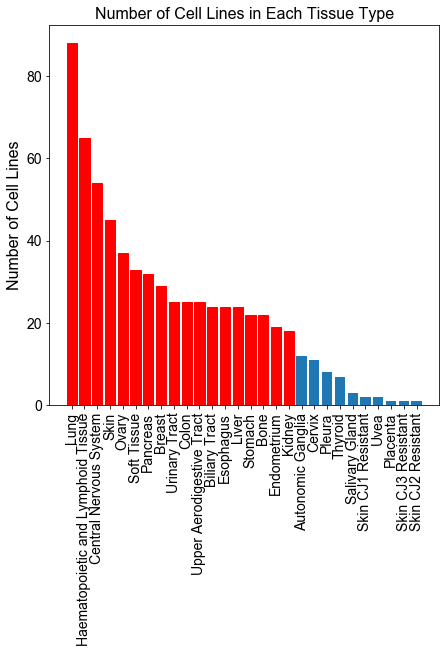

In [12]:
figsize(7,7)
barlist=bar(arange(28), tissue_len )
xticks(arange(28),name_tiss, size=14, rotation=90)
yticks(size=14)
title('Number of Cell Lines in Each Tissue Type', size=16)
ylabel('Number of Cell Lines', size=16)
for i in range(18):
    barlist[i].set_color('r')
savefig('./model_figs_FIG1/1A.png', format='png', dpi=350, bbox_inches='tight')
savefig('./model_figs_FIG1/1A.pdf', format='pdf', bbox_inches='tight')

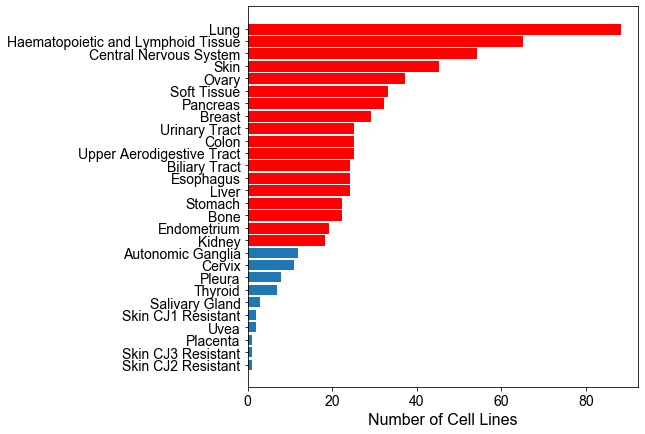

In [13]:
figsize(7,7)
barlist=barh(arange(28), sorted(tissue_len) )
yticks(arange(28),reversed(name_tiss), size=14, rotation=0)
xticks(size=14)
#title('Number of Cell Lines in Each Tissue Type', size=16)
xlabel('Number of Cell Lines', size=16)

for i in range(10,28):
    barlist[i].set_color('r')
savefig('./model_figs_FIG1/1A_horizontal.png', format='png', dpi=350, bbox_inches='tight')
savefig('./model_figs_FIG1/1A_horizontal.pdf', format='pdf', bbox_inches='tight')

In [18]:
# remove unnecessary skin res points
name_tiss_mod=['Lung','Haematopoietic and Lymphoid Tissue', 'Central Nervous System', 'Skin', 'Ovary', 'Soft Tissue','Pancreas','Breast', 
          'Urinary Tract', 'Colon',  'Upper Aerodigestive Tract', 'Biliary Tract','Esophagus',  'Liver', 'Stomach',
           'Bone', 'Endometrium','Kidney','Autonomic Ganglia', 'Cervix','Pleura',
           'Thyroid', 'Salivary Gland',  'Uvea', 'Placenta']
tissue_len_mod=[88,
 65,
 54,
 45,
 37,
 33,
 32,
 29,
 25,
 25,
 25,
 24,
 24,
 24,
 22,
 22,
 19,
 18,
 12,
 11,
 8,
 7,
 3,
 
 2,
 1,
 ]


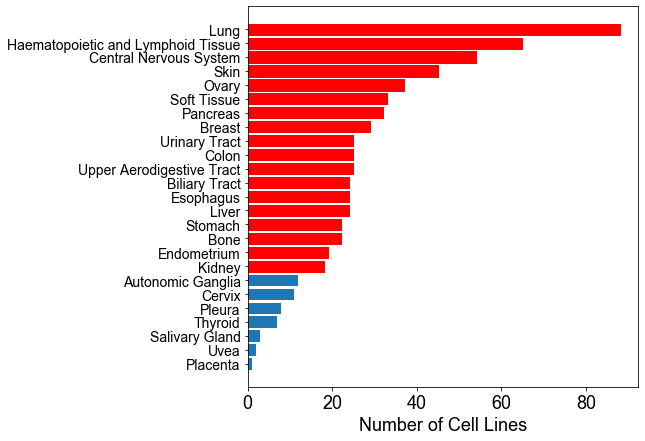

In [19]:
figsize(7,7)
barlist=barh(arange(25), sorted(tissue_len_mod) )
yticks(arange(25),reversed(name_tiss_mod), size=14, rotation=0)
xticks(size=18)
#title('Number of Cell Lines in Each Tissue Type', size=16)
xlabel('Number of Cell Lines', size=18)

for i in range(7,25):
    barlist[i].set_color('r')
savefig('./model_figs_FIG1/1A_horizontal_skin_rem.png', format='png', dpi=350, bbox_inches='tight')
savefig('./model_figs_FIG1/1A_horizontal_skin_rem.pdf', format='pdf', bbox_inches='tight')

In [20]:
def plot_cumulative_ess_and_newly_discovered_all (bootstrapped_samples):
    #figure( figsize(14,5))

    ess_per_screen={}
    
    bootstrapped_samples1=bootstrapped_samples.copy()   
    bootstrapped_samples1[bootstrapped_samples1>=10]=10
    bootstrapped_samples1[bootstrapped_samples1<10]=0
    bootstrapped_samples1[bootstrapped_samples1>0]=1
    essential_count = bootstrapped_samples1.sum(1)
    numhits_per_screen = bootstrapped_samples1.sum(0)

    ess_per_screen= pd.DataFrame( index=bootstrapped_samples1.columns.values)
    ess_per_screen['Number_of_Hits_At_BF10']=numhits_per_screen

    #ess_per_screen.sort_values('Number_of_Hits_At_BF10', ascending=False,inplace=True)
    cumulative_essentials = {}

    numSamples, numCols = ess_per_screen.shape

    cumulative_essentials_count = zeros(numSamples)
    hits_per_screen=dict()
    for k in range(numSamples):
        s = ess_per_screen.index.values[k]
        hits = (all_tissues.loc[:,s][all_tissues.loc[:,s]>=10]).index
        hits_per_screen[s]=hits # get hits per screen
        for h in hits:
            cumulative_essentials[h] = 1
        cumulative_essentials_count[k] = len(cumulative_essentials.keys())
    #return plot( arange(1,9), cumulative_essentials_count, linestyle=':', marker='o', markersize=1, label='all_tissues-bootstrapped') 
    #return hits_per_screen

    #get actual list of cumulative essentials
    cumulative_essentials_q4_all_tissues_bootstrap=list(cumulative_essentials.keys())
    
    # get number of newly discovered hits
    
    newly_discovered = [cumulative_essentials_count[0]] + [ cumulative_essentials_count[m] - cumulative_essentials_count[m-1] for m in range(1, len(cumulative_essentials_count)) ]


    return cumulative_essentials_q4_all_tissues_bootstrap, cumulative_essentials_count, newly_discovered
    
    

In [21]:
all_tissues=bf

In [22]:
#get only cumulative essentials by bootstrapping
all_tissues_samples=pd.Series(all_tissues.dtypes.index)
all_tissues_data=all_tissues
bootst=dict()
bootst_all_tissues=dict()
cumul_ess_count=dict()
new_hits=dict()

for i in range(100): # for 100 iterations 
    bootst[i] = all_tissues_samples.sample(replace=False, n=20) #sample 20
    bootst_all_tissues[i]=all_tissues[bootst[i]]
              
        
    cumul_ess_count[i]= (plot_cumulative_ess_and_newly_discovered_all (bootst_all_tissues[i]))[1]
    new_hits[i]= (plot_cumulative_ess_and_newly_discovered_all (bootst_all_tissues[i]))[2]
   

In [23]:
cumulatives  = numpy.array([arr.tolist() for arr in cumul_ess_count.values()])
news=numpy.array([arr for arr in new_hits.values()])

/Users/mervedede/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


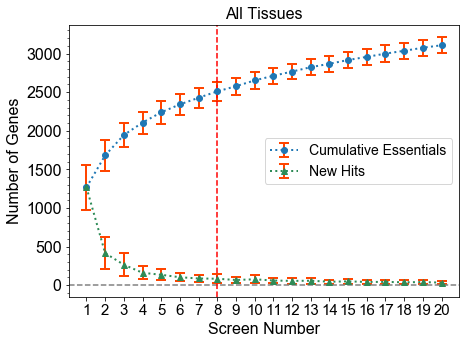

In [24]:
figsize(7,5)
#figsize(7,7)
plt.errorbar(arange(1,21), cumulatives.mean(axis=0), yerr=cumulatives.std(axis=0),  linestyle=':', marker='o', lw=2, capsize=5, capthick=2, ecolor='orangered', label='Cumulative Essentials')

plt.errorbar(arange(1,21), news.mean(axis=0), color='seagreen', yerr=news.std(axis=0), linestyle=':',  marker='^', lw=2, capsize=5, capthick=2, ecolor='orangered', label= 'New Hits')
title('All Tissues', size=16)
ylabel('Number of Genes', size=16)
xlabel('Screen Number', size=16)

xticks(arange(1,21), size=15, rotation=0)
yticks(size=16)
legend(fontsize=14)
ml = MultipleLocator(100)
plt.axes().yaxis.set_minor_locator(ml)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=8, color ='red', linestyle= '--')
savefig("./model_figs_FIG1/1B.png", format='png', dpi=350, bbox_inches='tight')
savefig("./model_figs_FIG1/1B.pdf", format='pdf', bbox_inches='tight')




## Now run the synthetic genome modeling

In [25]:
def plot_cumulative_ess(bootstrapped_samples, BF_used):
    

    ess_per_screen={}
    
    bootstrapped_samples1=bootstrapped_samples.copy()   
    bootstrapped_samples1[bootstrapped_samples1>= BF_used]=20
    bootstrapped_samples1[bootstrapped_samples1< BF_used]=0
    bootstrapped_samples1[bootstrapped_samples1>0]=1
    essential_count = bootstrapped_samples1.sum(1)
    numhits_per_screen = bootstrapped_samples1.sum(0)

    ess_per_screen= pd.DataFrame( index=bootstrapped_samples1.columns.values)
    ess_per_screen['Number_of_Hits_At_BF']=numhits_per_screen

    #ess_per_screen.sort_values('Number_of_Hits_At_BF10', ascending=False,inplace=True) #ERROR HERE! We should not rank
    cumulative_essentials = {}

    numSamples, numCols = ess_per_screen.shape

    cumulative_essentials_count = zeros(numSamples)
    hits_per_screen=dict()
    for k in range(numSamples):
        s = ess_per_screen.index.values[k]
        hits = (bf.loc[:,s][bf.loc[:,s]>=BF_used]).index
        hits_per_screen[s]=hits # get hits per screen
        for h in hits:
            cumulative_essentials[h] = 1
        cumulative_essentials_count[k] = len(cumulative_essentials.keys())
    
    return cumulative_essentials_count, ess_per_screen
    

In [26]:
#get only cumulative essentials by bootstrapping from all screens
bf_1=bf.copy()
bf_samples=pd.Series(bf_1.dtypes.index)
bf_data=bf_1.copy()
bootst=dict()
bootst_bf=dict()
bf_cumul_ess_count=dict()
bf_ess_per_sc=dict()

for i in range(100): # for 100 iterations 
    bootst[i] = bf_samples.sample(replace=False, n=8) #sample 8
    bootst_bf[i]=bf_1[bootst[i]]
              
        
    bf_cumul_ess_count[i]= (plot_cumulative_ess (bootst_bf[i], 10)[0])
    bf_ess_per_sc[i]= (plot_cumulative_ess (bootst_bf[i],10)[1])
    
    
    
    

In [27]:
bf_cumulatives  = numpy.array([arr.tolist() for arr in bf_cumul_ess_count.values()])

In [28]:
'''means=list()
for i in bf_ess_per_sc:
    means.append(bf_ess_per_sc[i]['Number_of_Hits_At_BF'].mean())'''

"means=list()\nfor i in bf_ess_per_sc:\n    means.append(bf_ess_per_sc[i]['Number_of_Hits_At_BF'].mean())"

In [30]:
bf_cumulatives.mean(axis=0)

array([1286.59, 1691.07, 1925.21, 2096.07, 2231.13, 2335.7 , 2435.29,
       2508.38])

## 1287 essential genes in a screen when we sample any 8 screens

In [31]:
#mean number of hits at BF gt 10 across all Avana screens=1287

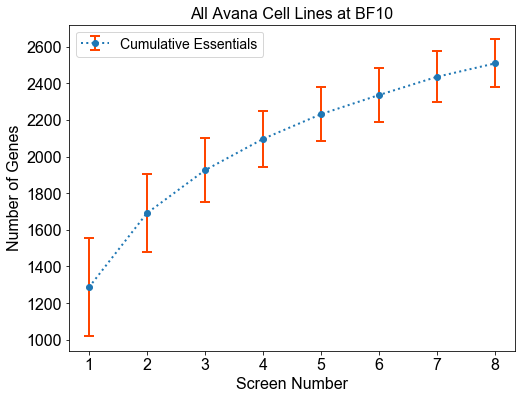

In [32]:
figsize(8,6)
#figsize(7,7)
plt.errorbar(arange(1,9), bf_cumulatives.mean(axis=0), yerr=bf_cumulatives.std(axis=0),  linestyle=':', marker='o', lw=2, capsize=5, capthick=2, ecolor='orangered', label='Cumulative Essentials')
title('All Avana Cell Lines at BF10', size=16)
ylabel('Number of Genes', size=16)
xlabel('Screen Number', size=16)

xticks(arange(1,9), size=16, rotation=0)
yticks(size=16)
legend(fontsize=14)
savefig("./model_figs_FIG1/All_avana_cumulative_ess_for8scr.png", format='png', dpi=350, bbox_inches='tight')
savefig("./model_figs_FIG1/All_avana_cumulative_ess_for8scr.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [36]:
bf.shape

(18111, 659)

In [37]:
#let's model this

In [38]:
import string
import random
import secrets
csprng = random.SystemRandom()
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
#1) create random genes
def random_string( len = 6, charsets = string.ascii_uppercase+ string.digits):
    #return ''.join(csprng.choices(charsets, k = len))
    return ''.join(random.choice(charsets) for x in range(len)) 





In [40]:
#2) create a synthetic genome of N genes with n number of essentials and with precision but 
#sample fixed at sample_num genes (mean num of screens in top 8) 
def synthetic_gen_precision_tissue_sample(N, n, precision, sample_num): 
    synthetic_genome = [random_string() for _ in range(N)]
    synthetic_genome=pd.DataFrame(synthetic_genome)
    synthetic_genome.columns=(['GENE'])
    synthetic_genome=synthetic_genome.set_index(['GENE'])
    essentials= n * [1] # 1 means essential
    nonessentials= (N-n) * [2] #2 means non essential
    synthetic_genome['Essentiality']= essentials + nonessentials
    
    k=round(sample_num) # we will sample 1734 genes out every time; some will be sampled from ess some noness
    
    sample_synthetic=dict()
    ess=round((precision)* sample_num)
    non_ess=round((sample_num) * (1-precision))

    for i in range(0,8): 
        if ess <= n :
            randsam_es=random.sample(set(synthetic_genome[synthetic_genome['Essentiality']==1].index), ess)
            randsam_nones=random.sample(set(synthetic_genome[synthetic_genome['Essentiality']==2].index), non_ess)
            randtotal= randsam_es + randsam_nones
            sample_synthetic[i]=randtotal
        else:
            random_es=list (synthetic_genome[synthetic_genome['Essentiality']==1].index) + random.sample(set(synthetic_genome[synthetic_genome['Essentiality']==2].index), (round(sample_num*precision)-n))
            random_nones=random.sample(set(synthetic_genome[synthetic_genome['Essentiality']==2].index), non_ess)
            randtotal=random_nones + random_es #sample from this instead of from es and nones
        
            sample_synthetic[i]=randtotal


    
    
    
    return sample_synthetic

In [81]:
def cumulative_plot_zoomed_8_screens(numSamples, cumulative_counts, labels):
    numSamples=arange(numSamples)
    figure( figsize(5,5))
    for i, j in zip(cumulative_counts,labels):
        plot( arange(1,9), i , label= j, marker='o', markersize=3) 
    plt.errorbar(arange(1,9), our_data.mean(axis=0), yerr=our_data.std(axis=0),  color='r', marker='o', lw=1, capsize=3, capthick=1, ecolor='red', label='Avana')
    #plot( numSamples, breast_cumulatives.mean(axis=0) , color= 'r', marker='o', markersize=2, label='Avana Top 8 Screens') #bu eklendi
    #title('All Cell Lines', size=16)
    xlim(0,9)
    
    xticks(arange(1,9),[1,2,3,4,5,6,7,8],size=16)
   
    #ylim(700,3500)
    ylim(900,3200) 
    yticks(size=14)
    xlabel('Screen number', size=18) 
    ylabel('Cumulative essential genes', size=18) 
    #title('Cumulative essentials with FDR 10%')
    
    legend(fontsize=16)
    savefig("best_model_1600_9p5FDR_r3000.png", format='png', dpi=350, bbox_inches='tight')
    savefig("best_model_1600_9p5FDR_r3000.pdf", format='pdf', dpi=350, bbox_inches='tight')
    show()

In [82]:
def cumulative_essential_genes_8_screens (gene_dictionary):
    sample_synthetic_cumulative_essentials = {}
    numSamples, numCols = (8,1) 

    sample_synthetic_cumulative_essentials_count = zeros(numSamples)

    
    for i in range(0,numSamples):
        s= gene_dictionary[i] # list of genes
        hits= s #which are the hits
        for h in hits:
            sample_synthetic_cumulative_essentials[h] = 1
        sample_synthetic_cumulative_essentials_count[i] = len(sample_synthetic_cumulative_essentials.keys())
    return sample_synthetic_cumulative_essentials_count



In [83]:
def get_rmse_from_beginning_8_screens_MEAN(num_genome, num_essential, list_of_precision, sample_num):
    
    list_cumulatives=list()
    labelss=list()
    names=list()
    
    for i in list_of_precision:
        #synthetic_genome_test = synthetic_gen_precision(num_genome, num_essential)
        list_cumulatives.append(cumulative_essential_genes_8_screens(synthetic_gen_precision_tissue_sample(num_genome, num_essential, i, sample_num))) #make list of cumul. essentials
        labelss.append(i)
        
        rms=dict()
        names.append(i)
        
        our_data_mean=our_data.mean(axis=0)
        for j,k in zip(list(list_cumulatives), names):
            rmse=sqrt(mean_squared_error(j, our_data_mean))
            rms[k]=rmse   
        
    #print (cumulative_plot_all(276, list_cumulatives, labelss))
    print (cumulative_plot_zoomed_8_screens(8, list_cumulatives, labelss))
    return rms

In [44]:
our_data=bf_cumulatives

In [45]:
bf.shape

(18111, 659)

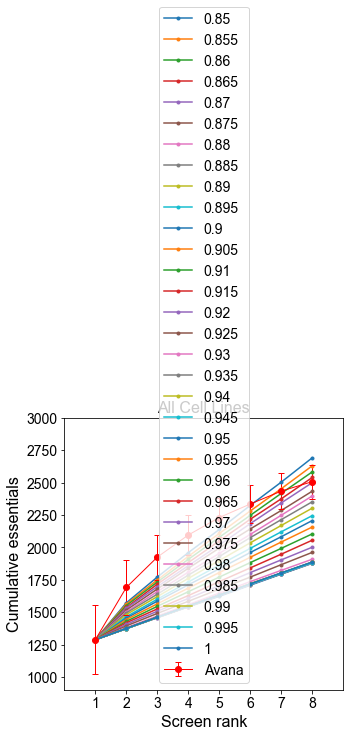

None


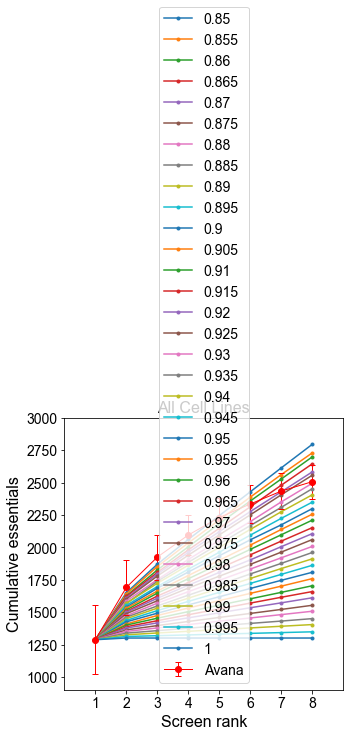

None


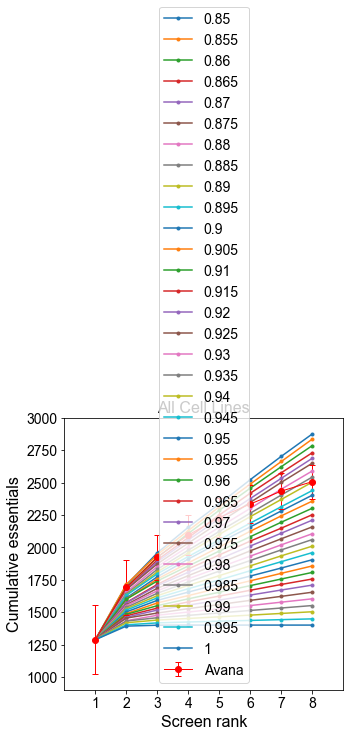

None


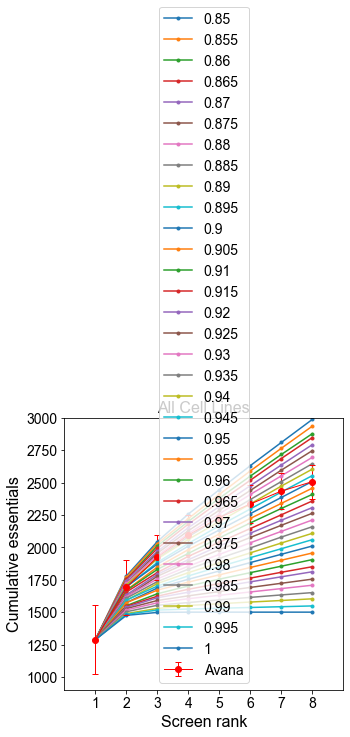

None


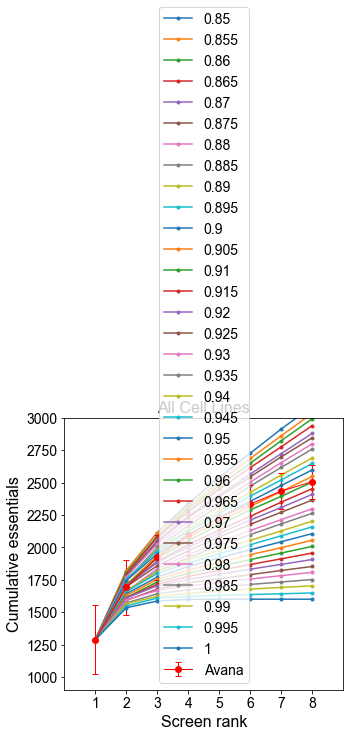

None


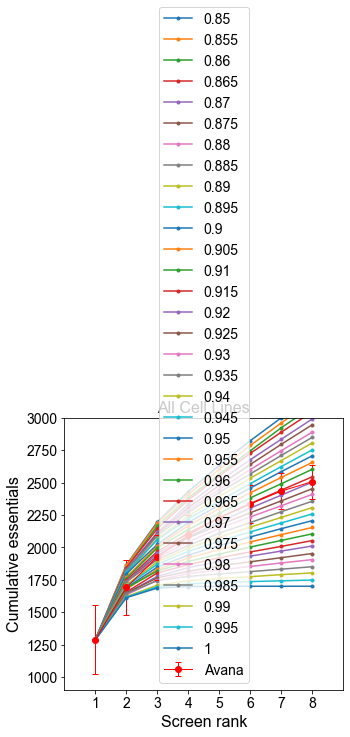

None


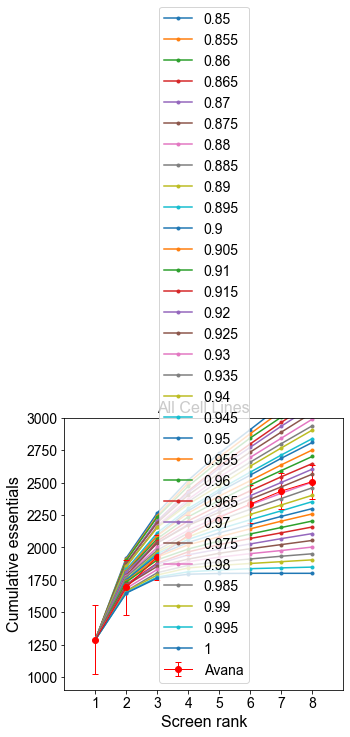

None


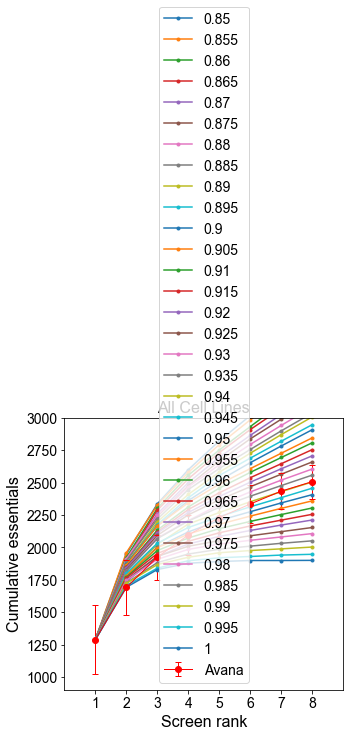

None


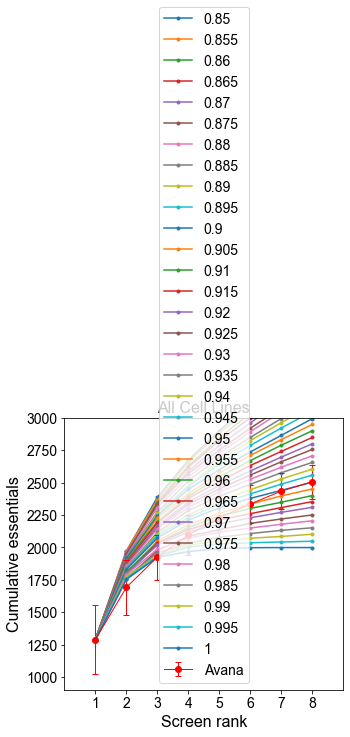

None


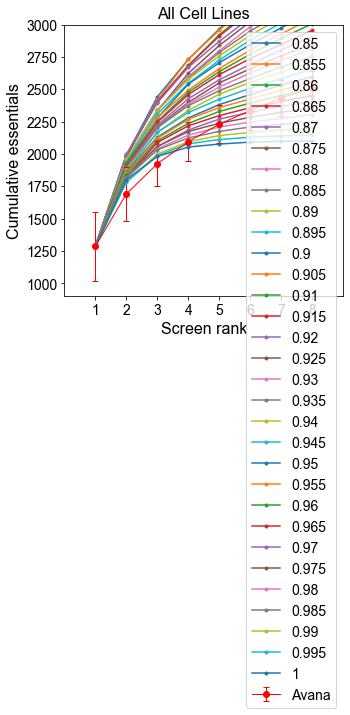

None


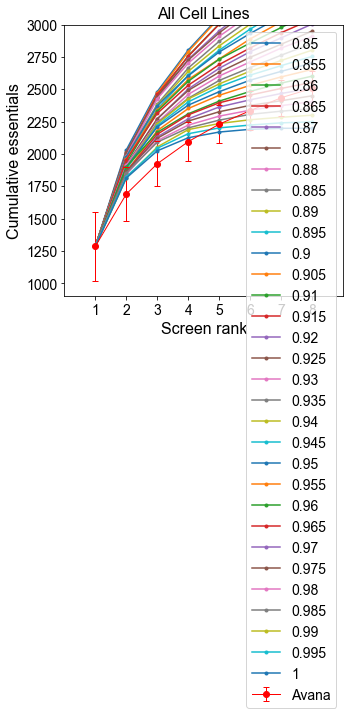

None


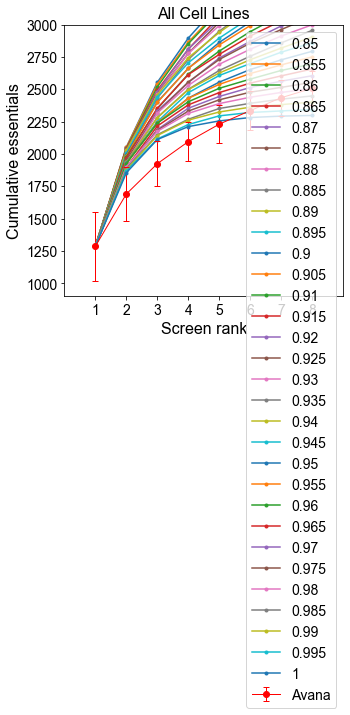

None


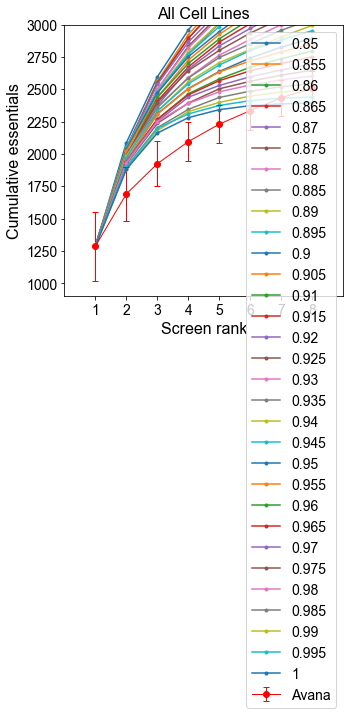

None


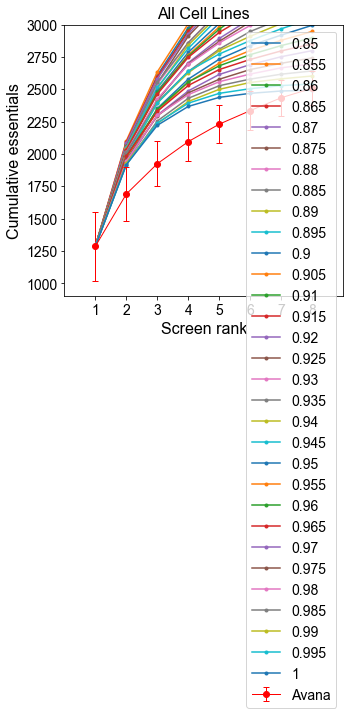

None


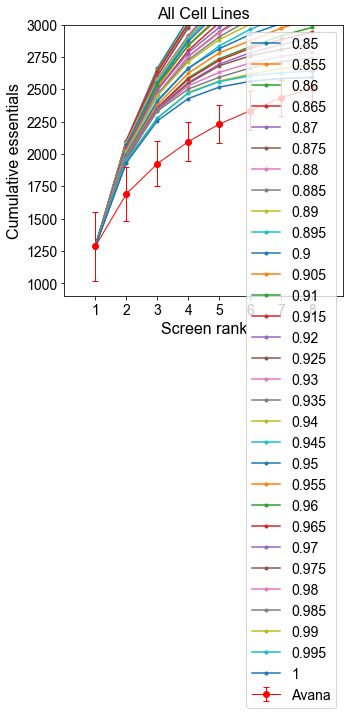

None


In [46]:

BF10_rmse_tissue_FDR=dict()

different_n=(1200,1300,1400, 1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600)
different_precision=(0.850,0.855,0.860,0.865,0.870,0.875,0.880,0.885,0.890,0.895,0.900,0.905,0.910, 0.915,0.920,0.925, 0.930,0.935, 0.940,0.945, 0.950,0.955, 0.960, 0.965,  0.970, 0.975, 0.980,0.985, 0.990, 0.995,1)

for i in different_n:
        
    BF10_rmse_tissue_FDR[i]=get_rmse_from_beginning_8_screens_MEAN(18111,i,different_precision,  1287)
    



In [47]:
import seaborn as sns

In [48]:
df_BF10_rmse_tissue_FDR = pd.DataFrame([(i,j,BF10_rmse_tissue_FDR[i][j]) for i in BF10_rmse_tissue_FDR.keys() for j in BF10_rmse_tissue_FDR[i].keys()], columns=["n", "Precision", "Rmse"])
df_BF10_rmse_tissue_FDR=df_BF10_rmse_tissue_FDR.pivot("Precision", "n", "Rmse")

color = plt.cm.coolwarm
color.set_under('white',1.0)

In [52]:
df_BF10_rmse_tissue_FDR.min().min()

21.8151822133119

In [55]:
df_BF10_rmse_tissue_FDR

n,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600
Precision,,,,,,,,,,,,,,,
0.850,114.028537,127.772560,180.114137,263.253494,341.003225,416.971665,492.463257,578.126978,643.876824,709.586827,783.691130,867.090926,937.462794,974.482120,1051.522783
0.855,116.397872,100.482534,155.324482,230.046321,308.831005,388.368674,462.348383,551.895069,622.861664,695.652057,766.975801,839.841680,892.818538,976.407471,1018.563602
0.860,126.879341,94.051646,128.192998,196.271113,280.536829,357.250258,433.918644,512.190477,590.453099,653.867083,725.391022,814.367999,861.861778,930.751661,995.874644
0.865,143.376801,86.987670,99.026308,174.303563,249.957896,335.359545,397.698585,485.927348,562.054844,638.546089,714.956345,779.108723,848.504399,914.107507,975.949043
0.870,162.259845,88.693022,76.801186,140.265221,210.626932,296.388457,379.020682,450.140378,533.837606,608.852162,675.493029,750.642408,814.860296,881.151370,937.514424
0.875,186.385628,101.308315,64.614644,112.189047,192.530601,267.797862,348.516115,424.452261,500.351878,569.417250,656.771857,718.674384,780.586336,856.177432,922.338227
0.880,214.417064,129.259051,59.676395,84.022748,159.901820,234.298271,313.788750,396.900652,475.499755,538.894836,625.964955,697.341518,757.531725,816.394188,879.681431
0.885,236.561387,151.119620,73.950725,57.449475,131.540363,212.631988,285.705875,365.778942,440.032016,515.766992,592.006598,658.294478,713.433828,796.907065,860.880508
0.890,265.008259,172.525388,90.821348,41.133468,92.570404,180.952396,262.978268,339.766412,412.733706,492.801461,559.957226,651.728996,713.089715,770.949327,836.074816


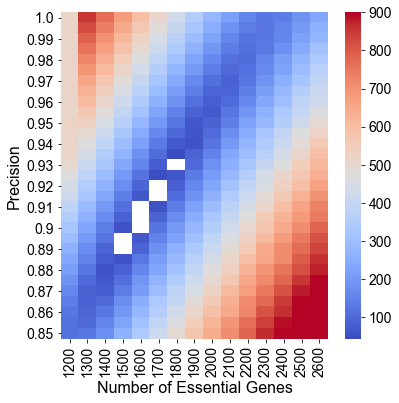

In [103]:
sns.heatmap(df_BF10_rmse_tissue_FDR.sort_index( ascending=False), cmap="coolwarm", vmin=df_BF10_rmse_tissue_FDR.min().min()*2, vmax=900)
#sns.heatmap(df_BF10_rmse_tissue_FDR.sort_index( ascending=False), cmap="coolwarm", vmin=22, vmax=900)

figsize(6,6)
#title('Bootstrapped All Cell Lines BF10', size=16)
xticks(rotation=90, size=14)
ylabel('Precision', size=16)
xlabel('Number of Essential Genes', size=16)
yticks(size=14)
savefig("./model_figs_FIG1/1D_twice_min_rmse.png", format="png", dpi=350, bbox_inches='tight')
savefig("./model_figs_FIG1/1D_twice_min_rmse.pdf", format="pdf", dpi=350, bbox_inches='tight')
#savefig("./model_figs_FIG1/1D_nomin.png", format="png", dpi=350, bbox_inches='tight')
#savefig("./model_figs_FIG1/1D_nomin.pdf", format="pdf", dpi=350, bbox_inches='tight')



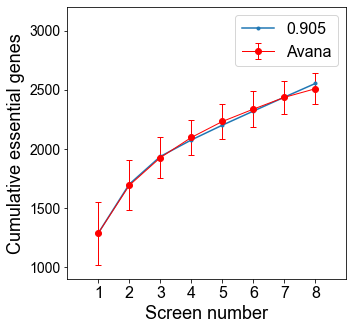

None


{0.905: 22.023843329446382}

In [94]:
get_rmse_from_beginning_8_screens_MEAN(18111, (1600), (0.905,), 1287)


## RMSE plot

In [96]:
df_BF10_rmse_tissue_FDR.head()

n,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600
Precision,,,,,,,,,,,,,,,
0.850,114.028537,127.772560,180.114137,263.253494,341.003225,416.971665,492.463257,578.126978,643.876824,709.586827,783.691130,867.090926,937.462794,974.482120,1051.522783
0.855,116.397872,100.482534,155.324482,230.046321,308.831005,388.368674,462.348383,551.895069,622.861664,695.652057,766.975801,839.841680,892.818538,976.407471,1018.563602
0.860,126.879341,94.051646,128.192998,196.271113,280.536829,357.250258,433.918644,512.190477,590.453099,653.867083,725.391022,814.367999,861.861778,930.751661,995.874644
0.865,143.376801,86.987670,99.026308,174.303563,249.957896,335.359545,397.698585,485.927348,562.054844,638.546089,714.956345,779.108723,848.504399,914.107507,975.949043
0.870,162.259845,88.693022,76.801186,140.265221,210.626932,296.388457,379.020682,450.140378,533.837606,608.852162,675.493029,750.642408,814.860296,881.151370,937.514424


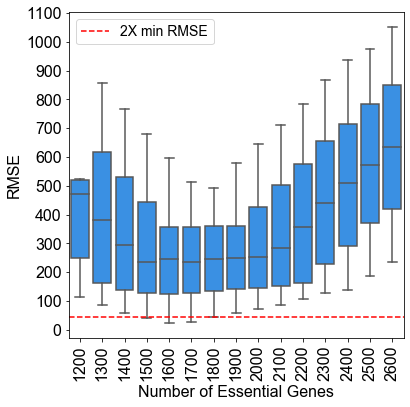

In [118]:
import seaborn as sns
figsize(6,6)
sns.boxplot(df_BF10_rmse_tissue_FDR.melt()['n'], df_BF10_rmse_tissue_FDR.melt()['value'], color='dodgerblue')
xticks(rotation=90, size=16)
yticks([0,100,200,300,400,500,600,700,800,900,1000,1100],size=16)
xlabel('Number of Essential Genes', size=16)
ylabel('RMSE', size=16)
plt.axhline(y=df_BF10_rmse_tissue_FDR.min().min()*2, color='red', linestyle='--', label='2X min RMSE')
legend()
savefig("./model_figs_FIG1/RMSE.png", format="png", dpi=350, bbox_inches='tight')
savefig("./model_figs_FIG1/RMSE.pdf", format="pdf", dpi=350, bbox_inches='tight')


plt.show()